In [1]:
import scanpy as sc
import pandas as pd

In [2]:
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# Step 1: Filtering

... storing 'feature_types' as categorical
... storing 'genome' as categorical


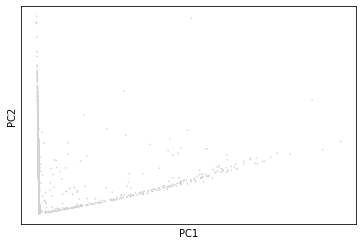

In [3]:
#Before pre-processing
sc.tl.pca(adata, 10)
sc.pl.pca(adata)

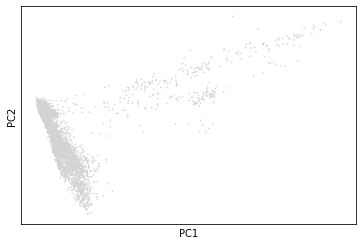

In [4]:
#After processing
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata, 10)
sc.pl.pca(adata)

# Step 2: Clustering

In [5]:
#Apply leiden clustering
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

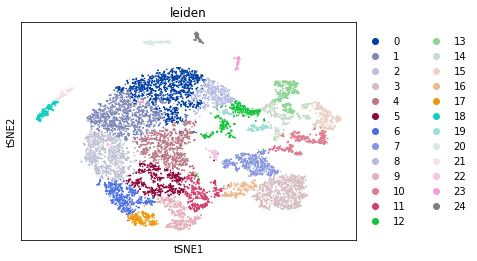

In [6]:
#tsne plot
sc.tl.tsne(adata)
sc.pl.tsne(adata, color = "leiden")

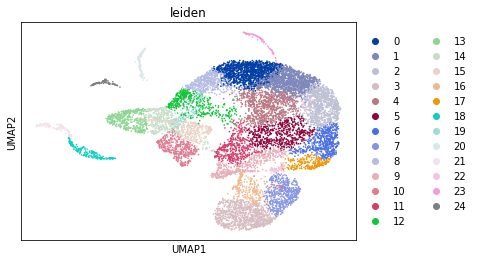

In [7]:
#umap plot
sc.tl.umap(adata)
sc.pl.umap(adata, color = "leiden")

# Step 3: Distinguishing genes

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


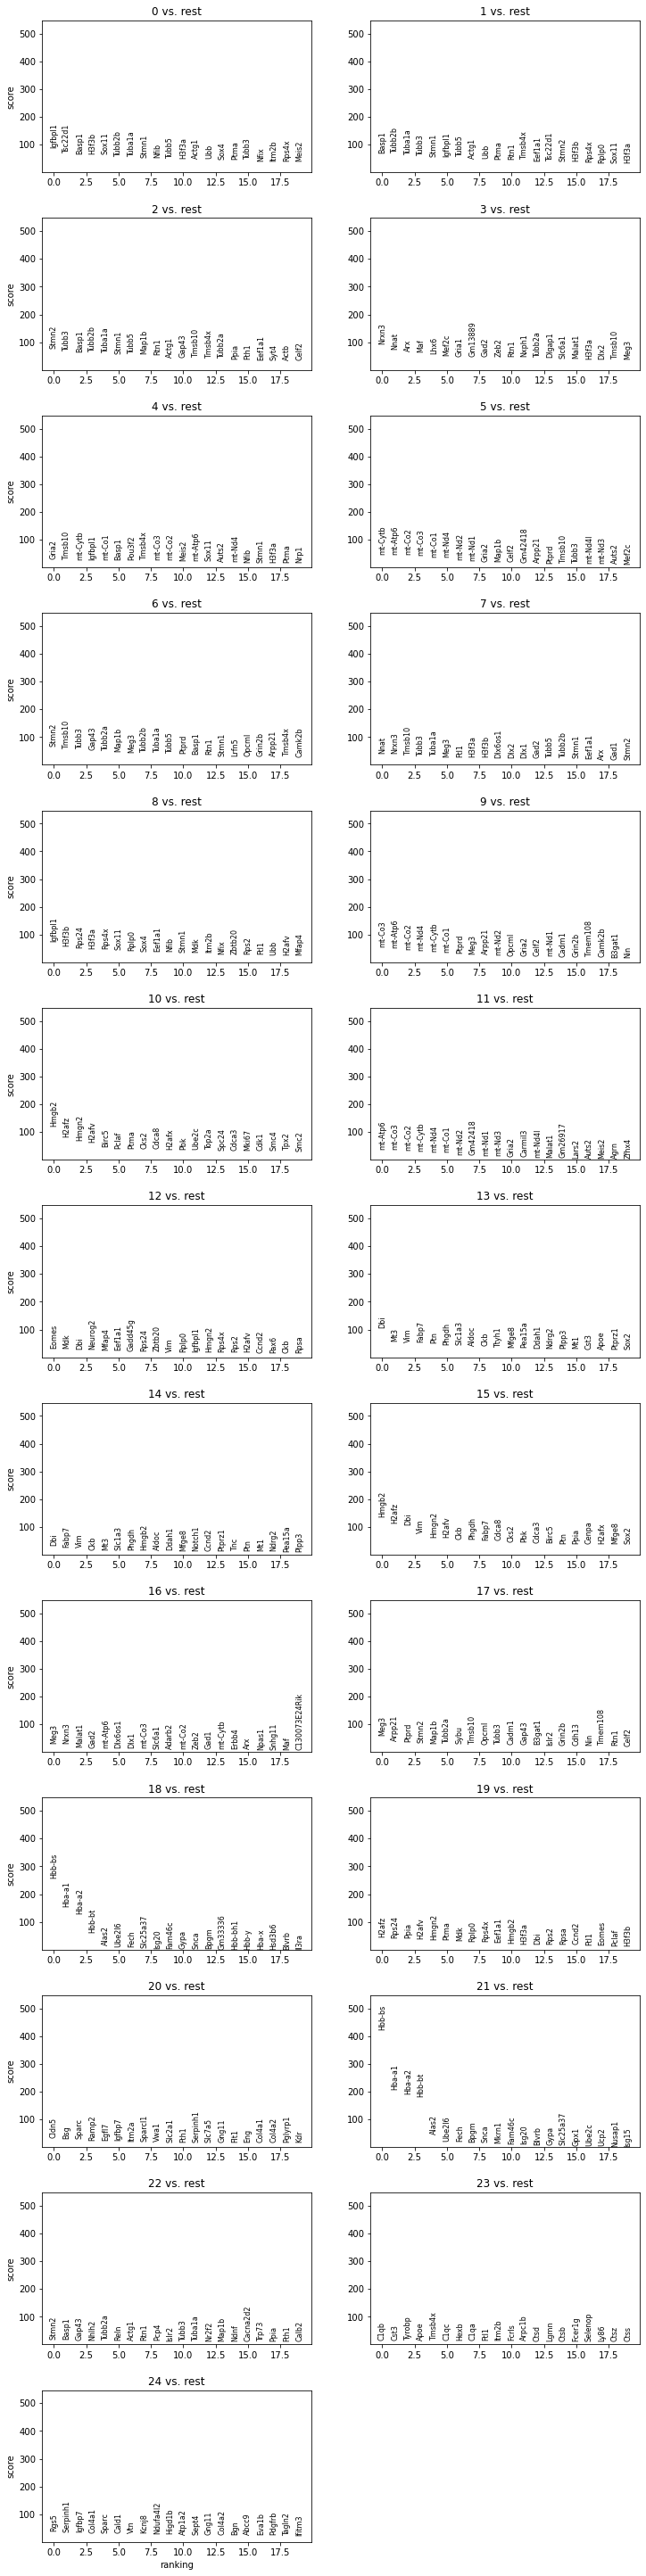

In [8]:
#Rank distinguishing genes by ttest
sc.tl.rank_genes_groups(adata, groupby = "leiden", method = "t-test")
sc.pl.rank_genes_groups(adata, ncols = 2)

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


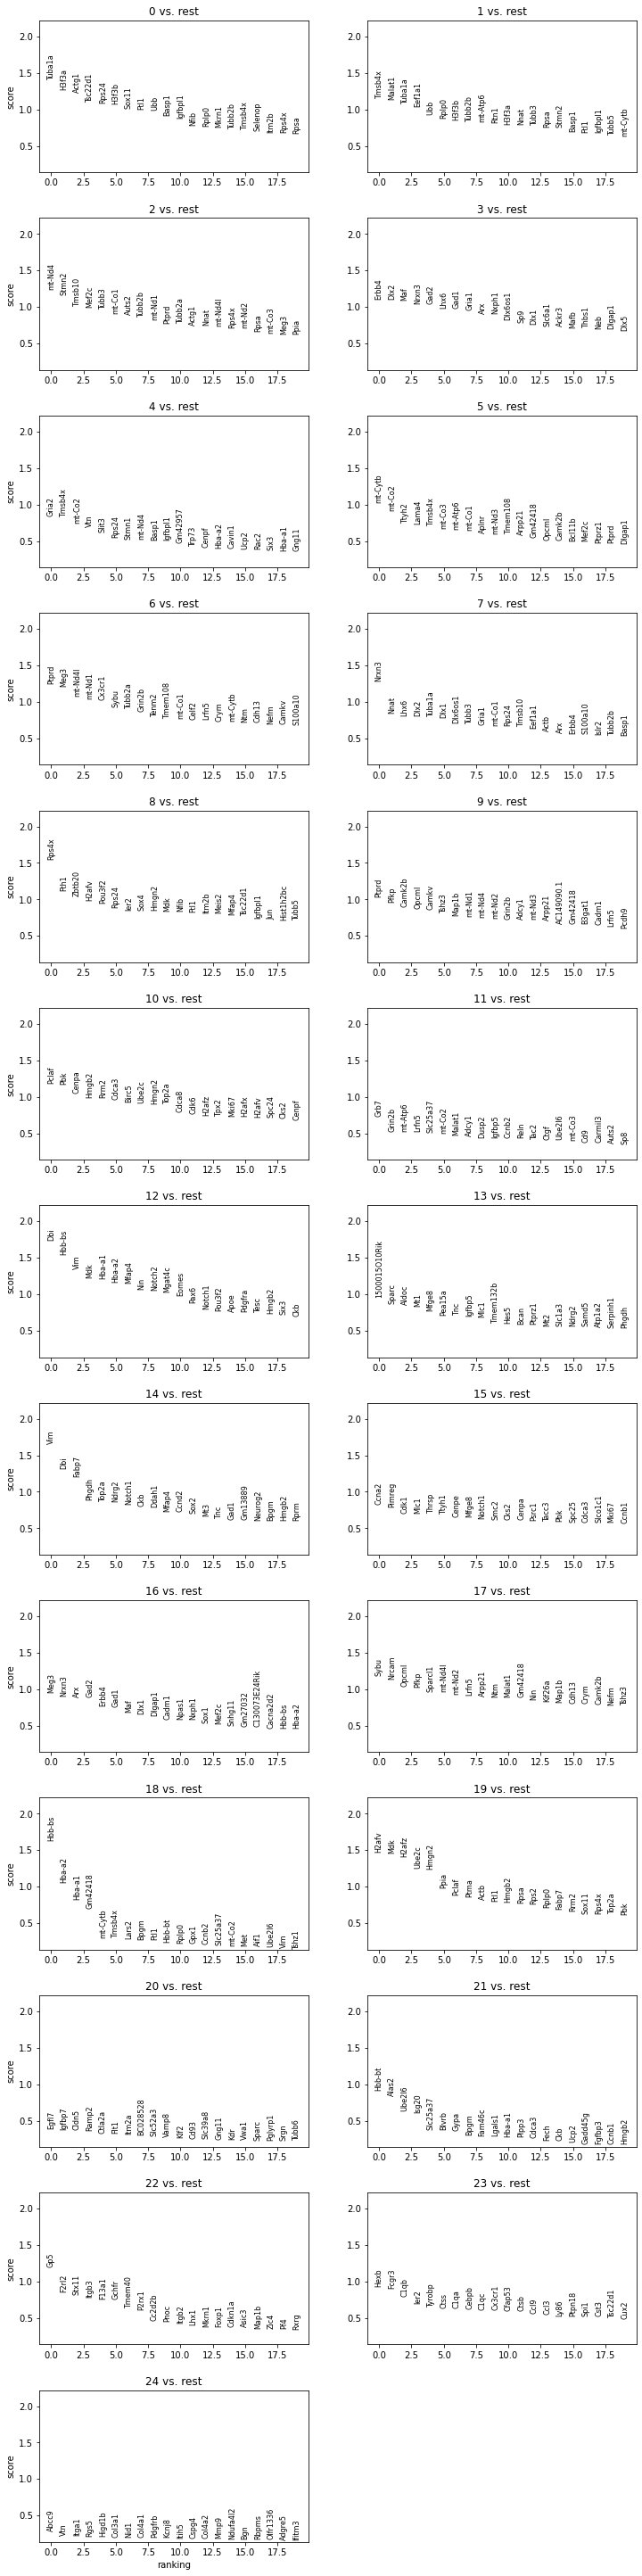

In [9]:
#Rank distinguishing genes by logistic regression
sc.tl.rank_genes_groups(adata, groupby = "leiden", method = "logreg")
sc.pl.rank_genes_groups(adata, ncols = 2)

# Step 4: Cell types

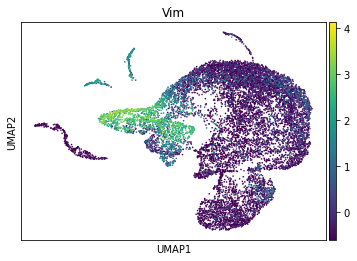

In [39]:
sc.pl.umap(adata, color = ["Vim"])

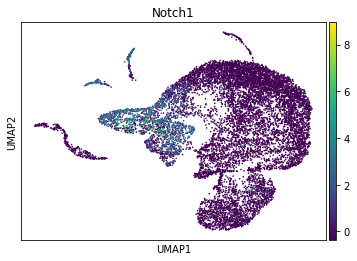

In [40]:
sc.pl.umap(adata, color = ["Notch1"])

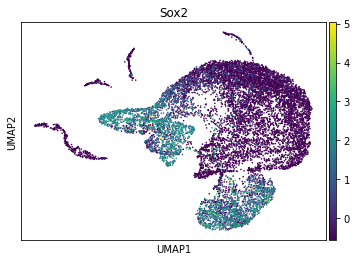

In [41]:
sc.pl.umap(adata, color = ["Sox2"])

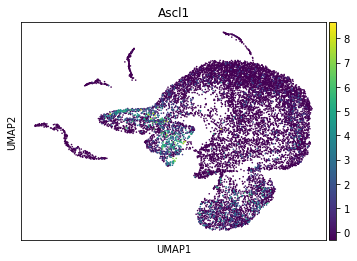

In [33]:
sc.pl.umap(adata, color=["Ascl1"])

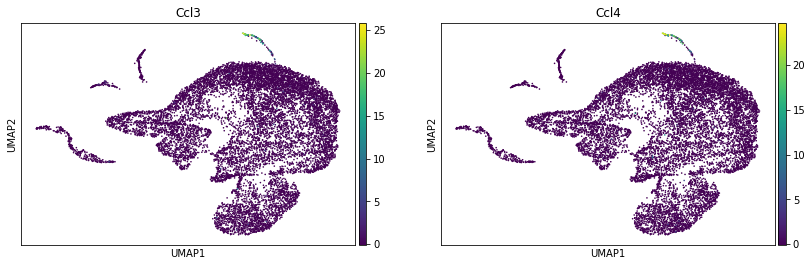

In [48]:
sc.pl.umap(adata, color=["Ccl3", "Ccl4"])

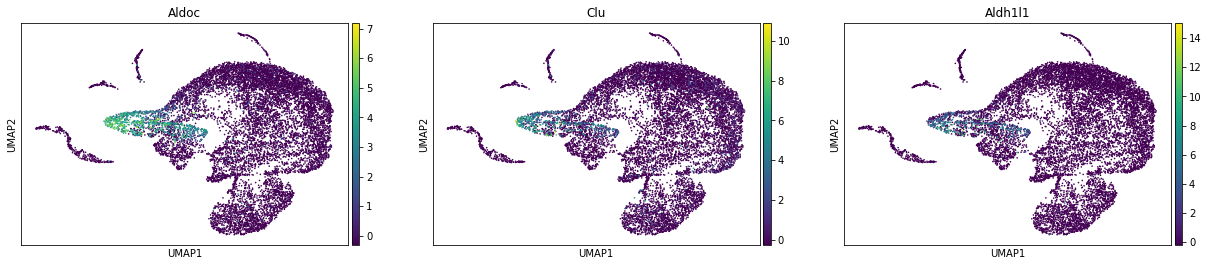

In [54]:
sc.pl.umap(adata, color = ["Aldoc", "Clu", "Aldh1l1"])

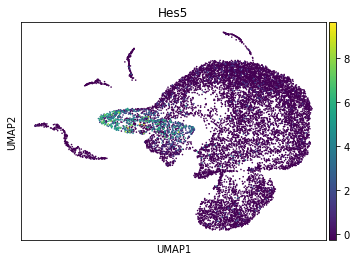

In [61]:
sc.pl.umap(adata, color = ["Hes5"])

source: https://www.abcam.com/neuroscience/neural-markers-guide

(1) Neuroepithelial cells: 
(2) Radial glia:
(3) Intermediate progenitors: Ascl1+ (14, 15)